# Data Exploration

In this file, I will:

- check if there are any missing values, abnormal values and outliers
- look at the distributions of and the correlations between the variables

A short summary is provided at the end.

## Setup

Load dependencies.

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Load datasets.

In [11]:
train = pd.read_csv('../data/raw/train.csv')
test = pd.read_csv('../data/raw/test.csv')

Create two helper functions that we will use to plot the features from the training and test datasets side-by-side to see if the observations of the two datasets come from the same distribution.

Bar plots are used for categorical data. Histograms are used for continuous data.

In [12]:
def countplot(feature):
    fig, ax = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
    for i, df_name in enumerate(['train', 'test']):
        df = eval(df_name)
        ax[i].title.set_text(df_name)
        sns.countplot(x=df[feature], ax=ax[i])
        for p in ax[i].patches:
            height = p.get_height()
            percentage = height / df.shape[0] * 100
            ax[i].text(
                x=p.get_x() + p.get_width() / 2.,
                y=height + 3, 
                s=f'{percentage:.2f}%',
                ha='center',
            ) 
    fig.tight_layout()


def histplot(feature):
    fig, ax = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
    for i, df_name in enumerate(['train', 'test']):
        df = eval(df_name)
        ax[i].title.set_text(df_name)
        sns.histplot(df[feature], ax=ax[i], kde=True)
    fig.tight_layout()

## Descriptive statistics

Print the descriptive statistics for the training dataset and the test dataset, including those that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.

Here is what each variable mean:

- claim_number - Claim ID (cannot be used in model)
- age_of_driver - Age of driver
- gender - Gender of driver
- marital_status - Marital status of driver
- safty_rating - Safety rating index of driver
- annual_income - Annual income of driver
- high_education_ind - Driver’s high education index
- address_change_ind - Whether or not the driver changed living address in past 1 year
- living_status - Driver’s living status, own or rent
- zip_code - Driver’s living address zipcode
- claim_date - Date of first notice of claim
- claim_day_of_week - Day of week of first notice of claim
- accident_site - Accident location, highway, parking lot or local
- past_num_of_claims - Number of claims the driver reported in past 5 years
- witness_present_ind - Witness indicator of the claim
- liab_prct - Liability percentage of the claim
- channel - The channel of policy purchasing
- policy_report_filed_ind - Policy report filed indicator
- claim_est_payout - Estimated claim payout
- age_of_vehicle - Age of first party vehicle
- vehicle_category - Category of first party vehicle
- vehicle_price - Price of first party vehicle
- vehicle_color - Color of first party vehicle
- vehicle_weight - Weight of first party vehicle
- fraud - Fraud indicator (0=no, 1=yes). This is the response variable

In [13]:
train.describe()

,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud
count,17998.000000,17998.000000,17993.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17866.000000,17998.000000,17998.000000,17981.000000,17990.000000,17998.000000,17998.000000,17998.000000
mean,14970.601622,43.695466,0.712722,73.562951,37367.655684,0.699189,0.577286,49875.595955,0.505001,0.232677,49.423269,0.600678,4975.792083,5.008060,23089.123114,23031.322385,0.156295
std,8659.940765,11.959819,0.452505,15.346807,2957.297249,0.458623,0.494004,29214.655149,0.955504,0.422550,33.678470,0.489773,2215.706510,2.258391,11988.429767,12052.385584,0.363604
min,1.000000,18.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.639432,0.000000,2457.329316,2429.429302,-1.000000
25%,7479.250000,35.000000,0.000000,65.000000,35554.000000,0.000000,0.000000,20111.000000,0.000000,0.000000,17.000000,0.000000,3337.029436,3.000000,14279.574850,14164.122133,0.000000
50%,14965.500000,43.000000,1.000000,76.000000,37610.000000,1.000000,1.000000,50028.000000,0.000000,0.000000,50.000000,1.000000,4668.796318,5.000000,20948.879250,20838.150260,0.000000
75%,22467.750000,51.000000,1.000000,85.000000,39318.000000,1.000000,1.000000,80038.000000,1.000000,0.000000,81.000000,1.000000,6255.901066,6.000000,29562.232780,29430.446293,0.000000
max,30000.000000,229.000000,1.000000,100.000000,54333.000000,1.000000,1.000000,85083.000000,6.000000,1.000000,100.000000,1.000000,17218.345010,16.000000,127063.506000,123016.650400,1.000000


In [14]:
test.describe()

,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight
count,12002.000000,12002.000000,12000.000000,12002.000000,12002.000000,12002.000000,12002.000000,12002.000000,12002.000000,11914.000000,12002.000000,12002.000000,11988.000000,11999.000000,12002.000000,12002.000000
mean,15045.335111,43.525162,0.715167,73.702966,37331.504833,0.698134,0.576737,49762.387269,0.494918,0.238711,49.770122,0.601066,5016.502211,4.969331,22925.335594,22860.701764
std,8661.251912,12.201298,0.451354,15.378967,2926.069309,0.459087,0.494097,29133.180765,0.956002,0.426313,33.581191,0.489699,2257.041870,2.227267,12108.888412,12198.142508
min,2.000000,19.000000,0.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,471.363743,0.000000,2261.507903,2583.428985
25%,7532.250000,35.000000,0.000000,66.000000,35550.000000,0.000000,0.000000,20111.000000,0.000000,0.000000,18.000000,0.000000,3367.182392,3.000000,14087.559950,13832.434587
50%,15055.500000,43.000000,1.000000,76.000000,37606.000000,1.000000,1.000000,50027.000000,0.000000,0.000000,50.000000,1.000000,4673.058955,5.000000,20642.029325,20508.293695
75%,22559.500000,51.000000,1.000000,85.000000,39313.000000,1.000000,1.000000,80036.750000,1.000000,0.000000,82.000000,1.000000,6295.292309,6.000000,29293.641235,29205.553660
max,29998.000000,278.000000,1.000000,100.000000,56275.000000,1.000000,1.000000,85083.000000,6.000000,1.000000,100.000000,1.000000,23903.366250,14.000000,106991.684500,101818.964200


## Missing values

Let's see which feature has missing values.

In [15]:
train.isnull().sum(axis=0).sort_values(ascending=False)[:10]

witness_present_ind    132
claim_est_payout        17
age_of_vehicle           8
marital_status           5
claim_number             0
past_num_of_claims       0
vehicle_weight           0
vehicle_color            0
vehicle_price            0
vehicle_category         0
dtype: int64

In [16]:
test.isnull().sum(axis=0).sort_values(ascending=False)[:10]

witness_present_ind        88
claim_est_payout           14
age_of_vehicle              3
marital_status              2
claim_number                0
past_num_of_claims          0
vehicle_color               0
vehicle_price               0
vehicle_category            0
policy_report_filed_ind     0
dtype: int64

The missing value percentage is relative small. Most of them come from `witness_present_ind` and `claim_set_payout`. A few of them are in `age_of_vehicle` and `marital_status`. 

Check if the missingness of `witness_present_ind` is related to the target variable `fraud`.

In [17]:
is_missing = train['witness_present_ind'].isna()
train[is_missing]['fraud'].value_counts()

0    116
1     16
Name: fraud, dtype: int64

Among the observations that have missing values in `witness_present_ind`, 12.1% of them have committed fraud. As we will see later, 15.6% of the entire training data has committed fraud, so it doesn't seem like the missingness is related to `fraud`.

## Distribution Comparison

### age_of_driver

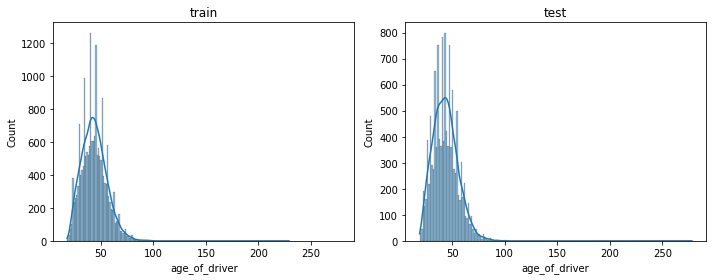

In [18]:
histplot('age_of_driver')

It seems like some claimers are over 100 years of age, which seems unusually high.

### marital_status

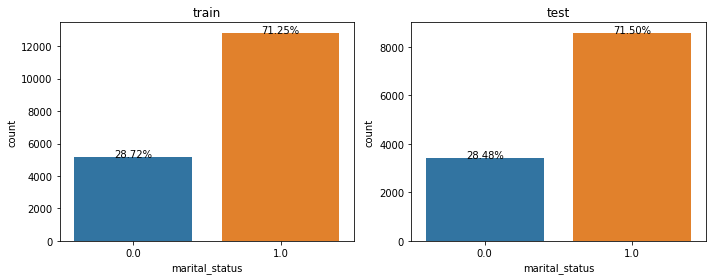

In [19]:
countplot('marital_status')

### gender

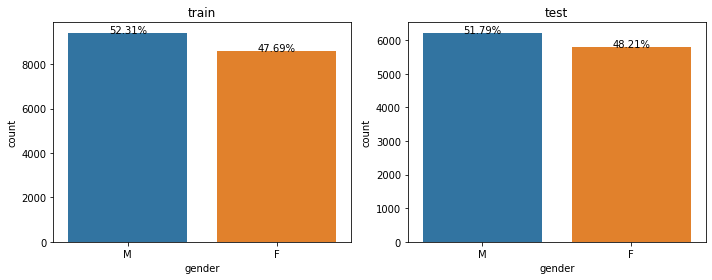

In [20]:
countplot('gender')

### safty_rating

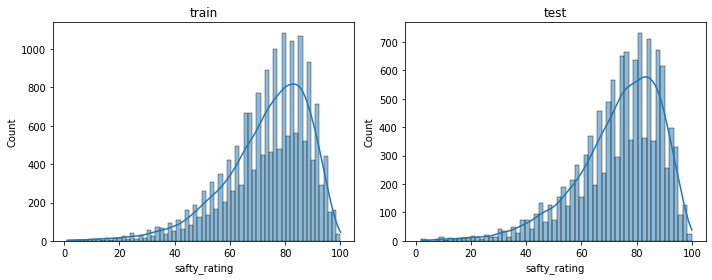

In [21]:
histplot('safty_rating')

### annual_income

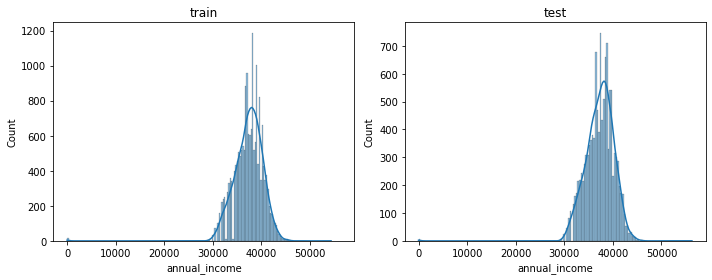

In [22]:
histplot('annual_income')

It seems like there is some abnormal data here too, as some people have income below 0.

### high_education_ind

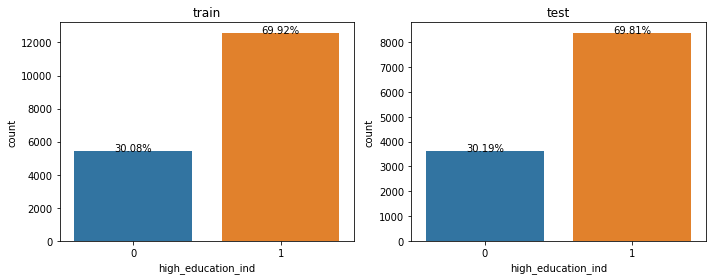

In [23]:
countplot('high_education_ind')

### address_change_ind

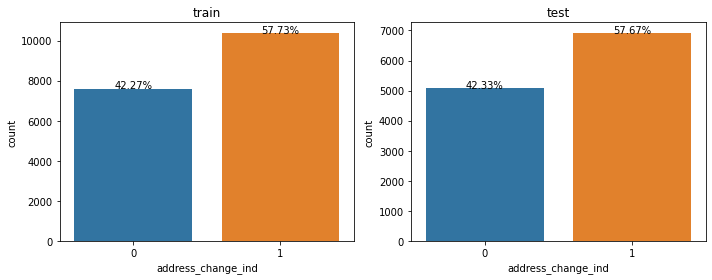

In [24]:
countplot('address_change_ind')

### living_status

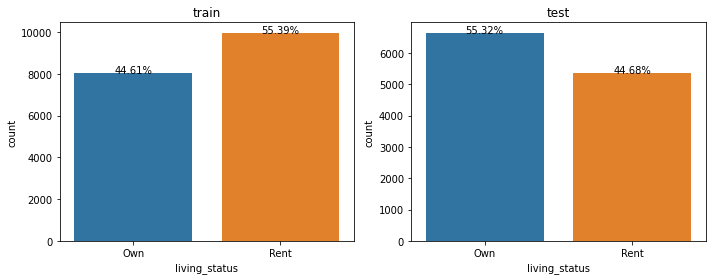

In [25]:
countplot('living_status')

### zip_code

In [26]:
train_zip_code_set = set(train['zip_code'])
test_zip_code_set = set(test['zip_code'])

Check if all the zip codes in the test set show up in the training set.

In [27]:
train_zip_code_set == test_zip_code_set

True

Check the number of unique zip codes in the dataset.

In [28]:
len(train_zip_code_set)

276

There are many unique `zip_code`. Instead of treating it as a categorical variable, we may get more information if we convert it into continuous variables such as latitude and longitude.

In [29]:
train['zip_code'].value_counts()

15001    283
15012    276
15025    236
50047    224
80022    219
        ... 
85039     30
20108     30
50038     28
80036     28
0         23
Name: zip_code, Length: 276, dtype: int64

Some `zip_code` is 0. We need to deal with this later.

### claim_date

In [30]:
for df in [train, test]:
    df['claim_date'] = pd.to_datetime(df['claim_date'])
    df['claim_year'] = df['claim_date'].dt.year
    df['claim_month'] = df['claim_date'].dt.month

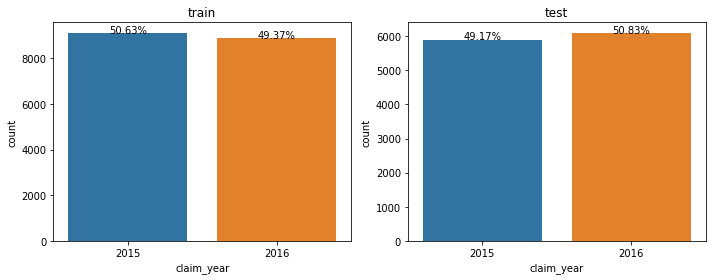

In [31]:
countplot('claim_year')

### accident_site

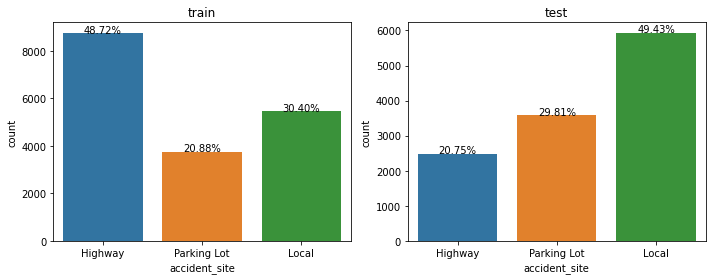

In [32]:
countplot('accident_site')

All the claims are in 2015 and 2016. But I don't think using the year of claim is a useful feature, since the model, if deployed, will most likely be used beyond 2015 and 2016. We will then be extraplotating.

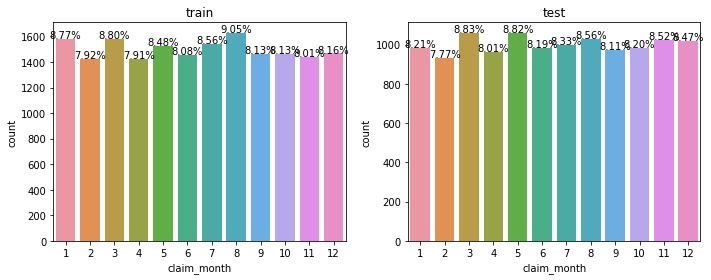

In [33]:
countplot('claim_month')

### claim_day_of_week

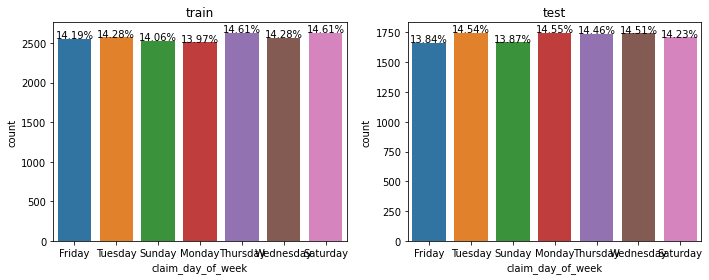

In [34]:
countplot('claim_day_of_week')

### past_num_of_claims

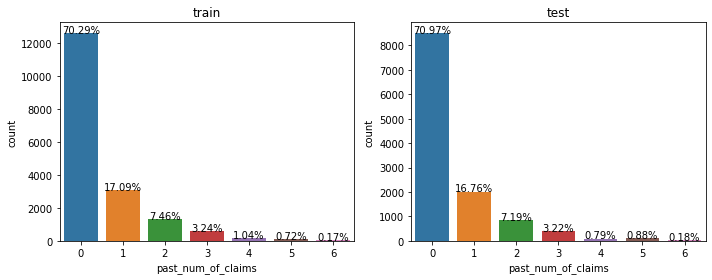

In [35]:
countplot('past_num_of_claims')

### witness_present_ind

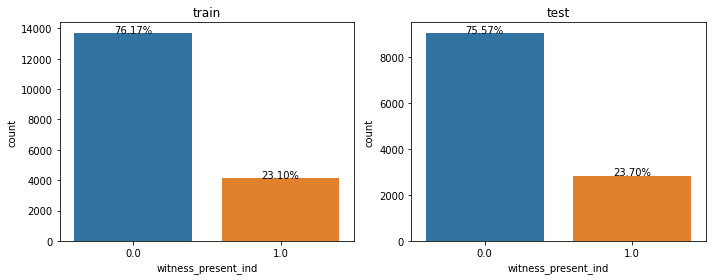

In [36]:
countplot('witness_present_ind')

### liab_prct

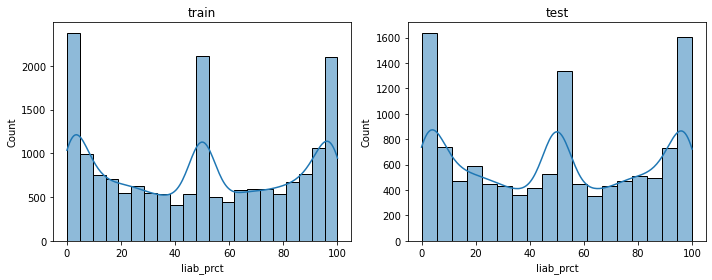

In [37]:
histplot('liab_prct')

### channel

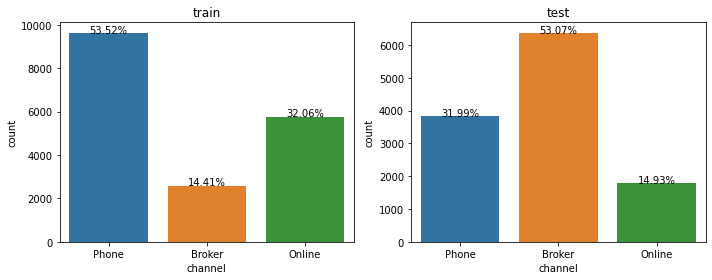

In [38]:
countplot('channel')

### policy_report_filed_ind

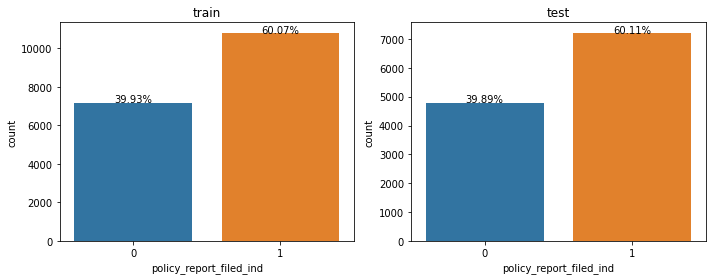

In [39]:
countplot('policy_report_filed_ind')

### claim_est_payout

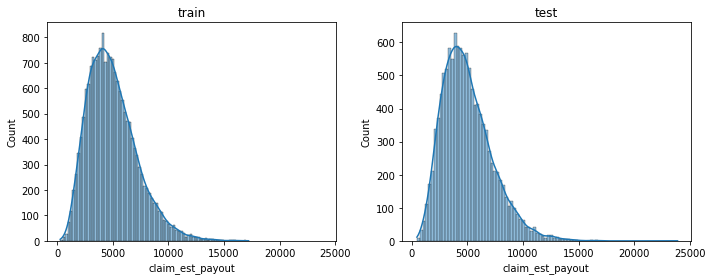

In [40]:
histplot('claim_est_payout')

### vehicle_category

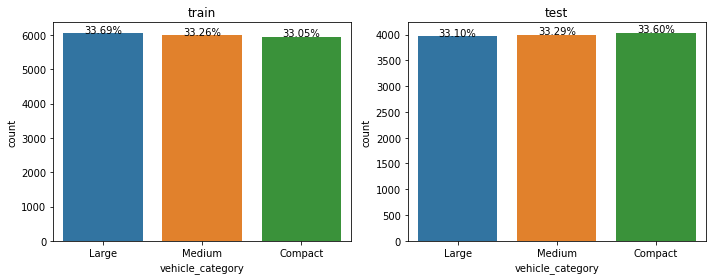

In [41]:
countplot('vehicle_category')

### vehicle_color

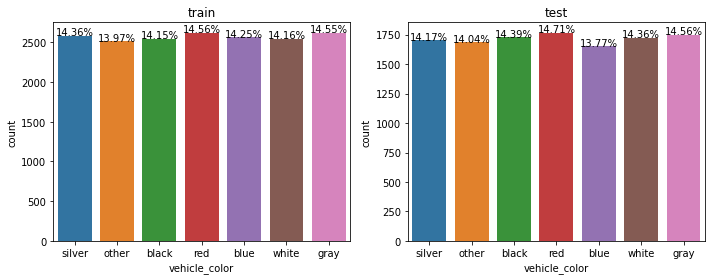

In [42]:
countplot('vehicle_color')

### vehicle_price

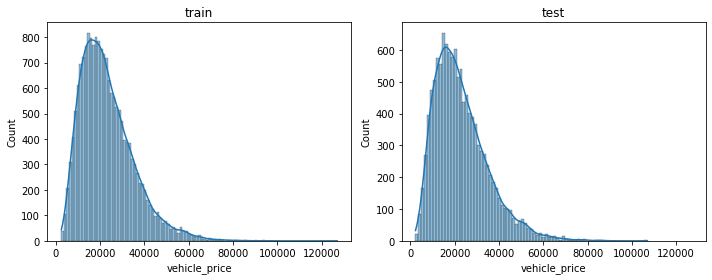

In [43]:
histplot('vehicle_price')

### vehicle_weight

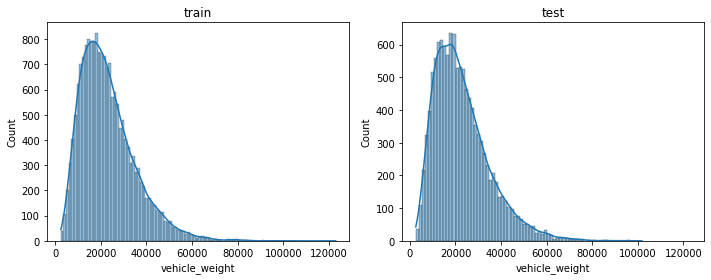

In [44]:
histplot('vehicle_weight')

### fraud

In [45]:
train['fraud'].value_counts()

 0    15179
 1     2816
-1        3
Name: fraud, dtype: int64

The target variable is supposed to be either 0 and 1. Observations that have `fraud = -1` are abnormal and should be removed later.

Also, there seems to be a class imbalance, only 15.6% of the people in training data comitted fraud.

## Correlations

- `annual_income`, `age_of_driver` and `living_status` seem to be related to each other, which makes sense because as you get older, you are more likely to get more education and more job experience, and hence a higher salary. A higher salary increases the possibility of owning a property.
    - `annual_income` and `age_of_driver` ($r = 0.91$)
    - `annual_income` and `living_status` ($r = 0.15$)
    - `living_status` and `age_of_driver` ($r = 0.13$)
- `past_num_of_claims` is positively correlated with `policy_report_file_ind` ($r = 0.25$) and `fraud` ($r = 0.12$).
- All other pairs of variables seems to be uncorrelated with each other ($r < 0.1$).

<AxesSubplot:>

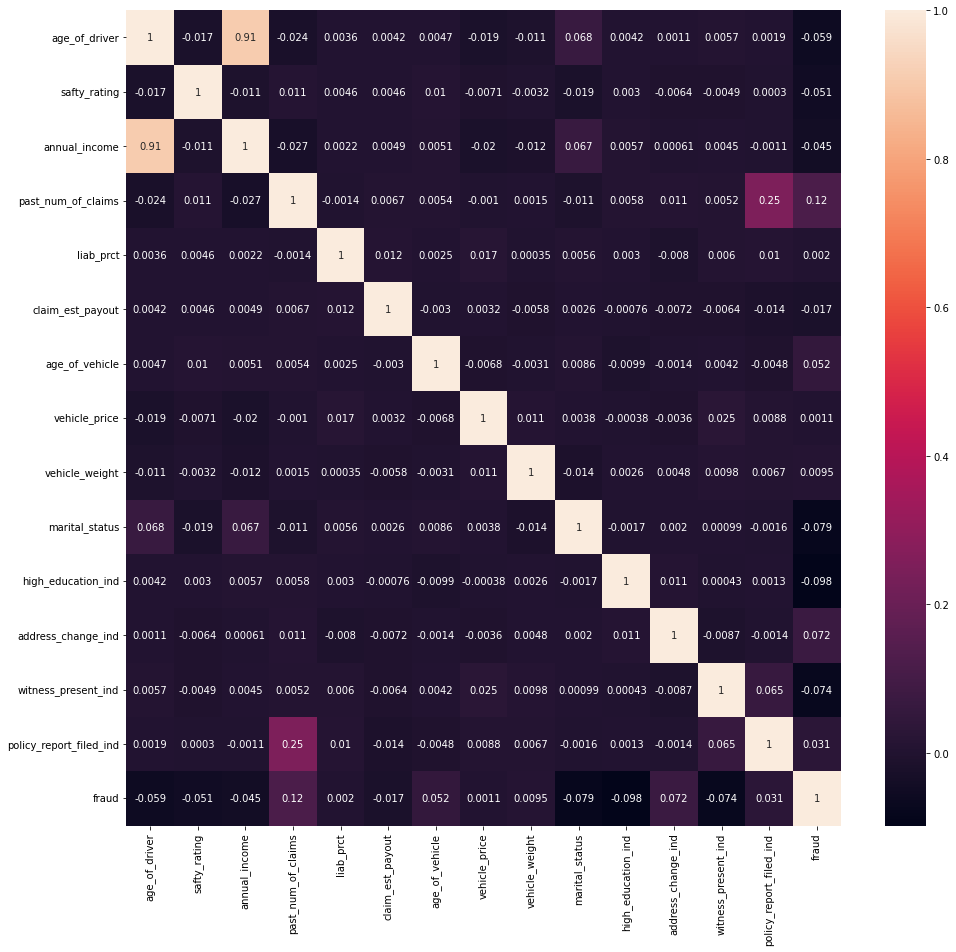

In [46]:
plt.figure(figsize=(16, 15))
numerical_features = ['age_of_driver', 'safty_rating', 'annual_income', 'past_num_of_claims', 'liab_prct', 'claim_est_payout', 'age_of_vehicle', 'vehicle_price', 'vehicle_weight']
binary_features = ['gender', 'marital_status', 'high_education_ind', 'address_change_ind', 'living_status', 'witness_present_ind', 'policy_report_filed_ind']
train_corr = train[numerical_features + binary_features + ['vehicle_category', 'fraud']].corr()
sns.heatmap(train_corr, annot=True)

## Summary

- There is a small percentage of missing values in `witness_present_ind`, `claim_est_payout`, `age_of_vehicle` and `marital_status`. We should either remove those observations or do some imputation.
- Other than `living_status`, `accident_site` and `channel`, the variables of the two datasets seem to come from the same distribution. In fact, the distributions are so similar that I suspect the data are simulated.
- Categories showed up in the test set can also be found in the training set, so there is no need to worry about extrapolation.
- There are many unique `zip_code`. We should transform `zip_code` into something more informative such as `latitude` and `longitude`.
- There are some abnormal data in `age_of_driver`, `annual_income`, `zip_code`, and `fraud`. We should either remove those observations or treat them as missing values.
- There seems to be a class imbalance for `fraud`. We may try some oversampling/undersampling methods.
- `age_of_driver` and `annual_income` have a very strong positive correlation. Maybe we should only use one of them.